# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

In [2]:
#Import the model
expected_model_version = '1.0'
model_path = '../models/car_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

# Load Data

In [3]:
car_data = pd.read_csv('../data/car_data_cleaned.csv')

In [4]:
samples_original = pd.read_csv('../data/sample_customized_cars.csv')

In [5]:
#The data for sample files is scraped from the Internet
samples_original

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,Audi,Q5,2021,premium unleaded (required),261.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,0,0,0,1,0
1,Toyota,Corolla,2021,regular unleaded,139.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,...,0,0,0,0,0,0,0,0,0,0


 # Transform the Sample Data

In [6]:
samples = pd.get_dummies(samples_original)
samples.head().T

,0,1
Year,2021.0,2021.0
Engine HP,261.0,139.0
Engine Cylinders,4.0,4.0
Number of Doors,4.0,4.0
highway MPG,28.0,38.0
city mpg,23.0,30.0
Popularity,3105.0,2031.0
MSRP,43300.0,20025.0
Crossover,1.0,0.0
Diesel,0.0,0.0


In [7]:
X = pd.get_dummies(car_data)
X.head().T

,0,1,2,3,4
Year,2011.0,2011.0,2011.0,2011.0,2011.0
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Number of Doors,2.0,2.0,2.0,2.0,2.0
highway MPG,26.0,28.0,28.0,28.0,28.0
...,...,...,...,...,...
Vehicle Style_Passenger Minivan,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Passenger Van,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Regular Cab Pickup,0.0,0.0,0.0,0.0,0.0
Vehicle Style_Sedan,0.0,0.0,0.0,0.0,0.0


In [8]:
#Pick a few row randomly from the original data
np.random.seed(42)
drop_indices = np.random.choice(X.index, 10, replace=False)
sample_fortest = X.iloc[drop_indices]
X = X.drop(drop_indices)

sample_original

In [9]:
#Assemble samples from original data to the samples
samples_comb = sample_fortest.merge(samples, how='outer')
samples_comb = samples_comb.fillna(0)
samples_comb

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Crossover,Diesel,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2012,255.0,8.0,3.0,15,11,5657,34160,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
1,2016,185.0,4.0,4.0,31,25,2202,33395,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2012,152.0,4.0,4.0,23,19,481,19299,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
3,2015,173.0,4.0,4.0,26,19,1851,25195,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2017,355.0,8.0,4.0,22,15,1385,54925,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
5,2014,268.0,6.0,4.0,25,18,2031,35080,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
6,1999,220.0,8.0,4.0,17,13,5657,3560,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
7,2002,322.0,12.0,4.0,15,11,86,229990,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
8,2012,318.0,6.0,2.0,27,18,1624,45850,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,2000,122.0,4.0,4.0,32,24,481,2000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


In [10]:
y = X.MSRP
X = X.drop(columns='MSRP')
y_test = samples_comb.MSRP
X_test = samples_comb.drop(columns='MSRP')

In [11]:
X.shape, X_test.shape

((11189, 1018), (12, 1018))

In [12]:
y.shape, y_test.shape

((11189,), (12,))

In [13]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8.0, n_estimators=316,
                                       n_jobs=-1, random_state=47))])

In [14]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [15]:
cv_results['test_score']

array([-10992.57174868,  -8779.53370018,  -7915.57152031,  -7940.56117615,
        -8927.30130453])

In [16]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(8911.107889970071, 1120.9923618152)

# Calculate Expected Car Price from the Model

In [17]:
MSRP_pred = model.predict(X_test)

In [18]:
MSRP_pred = pd.Series(MSRP_pred, name="Predicted")

In [19]:
diff = MSRP_pred-y_test
diff.name="Difference"
perc_diff = diff/y_test*100
perc_diff.name = '% Diff'

Price_diff = pd.concat([pd.concat([pd.concat([y_test, MSRP_pred],axis=1),diff],axis=1),perc_diff], axis=1)
Price_diff

,MSRP,Predicted,Difference,% Diff
0,34160,30803.713039,-3356.286961,-9.825196
1,33395,26315.280048,-7079.719952,-21.199940
2,19299,18883.811880,-415.188120,-2.151345
3,25195,25456.071001,261.071001,1.036202
4,54925,45240.675228,-9684.324772,-17.631907
5,35080,34478.147403,-601.852597,-1.715657
6,3560,2680.239470,-879.760530,-24.712374
7,229990,258854.811463,28864.811463,12.550464
8,45850,47784.199938,1934.199938,4.218539
9,2000,2414.821181,414.821181,20.741059


Text(0, 0.5, 'count')

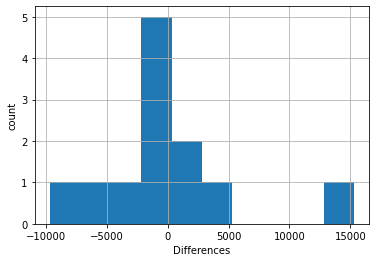

In [47]:
diff.hist()
plt.xlabel('Differences')
plt.ylabel('count')

<AxesSubplot:ylabel='% Diff'>

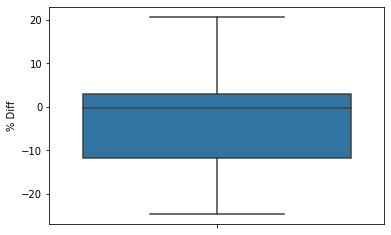

In [20]:
sns.boxplot(y='% Diff', data=Price_diff)

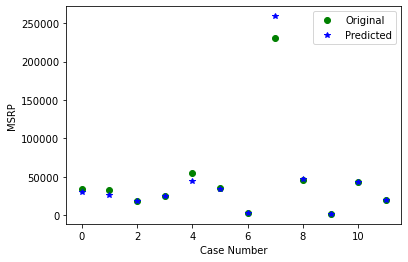

In [21]:
# Draw two sets of points
plt.plot(y_test, 'go')  # green dots for original price
plt.plot(MSRP_pred, 'b*')  # blue stars for predicted price
plt.xlabel('Case Number')
plt.ylabel('MSRP')
plt.legend(['Original','Predicted'])

The model performance is generally good. The first quartile to the third quartile is about -12% to 3%. The range of the difference varies quite a bit. However, those two cases from the sample file perform really good. The difference is only a few hundred dollars. 

# Prediction without brands and model names

In [22]:
samples_mod = samples_original.drop(['MSRP','Make','Model'],axis=1)

In [23]:
X_mod = car_data.drop(['MSRP','Make','Model'],axis=1)

In [24]:
X_mod = pd.get_dummies(X_mod)
samples_mod = pd.get_dummies(samples_mod)
X_mod

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Crossover,Diesel,Exotic,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,2012,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11195,2012,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11196,2012,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11197,2013,300.0,6.0,4.0,23,16,204,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
new_sample_fortest = X_mod.iloc[drop_indices]
X_mod = X_mod.drop(drop_indices)

In [26]:
new_samples_comb = new_sample_fortest.merge(samples_mod, how='outer')
new_samples_comb = new_samples_comb.fillna(0)
new_samples_comb

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Crossover,Diesel,Exotic,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2012,255.0,8.0,3.0,15,11,5657,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
1,2016,185.0,4.0,4.0,31,25,2202,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2012,152.0,4.0,4.0,23,19,481,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
3,2015,173.0,4.0,4.0,26,19,1851,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2017,355.0,8.0,4.0,22,15,1385,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
5,2014,268.0,6.0,4.0,25,18,2031,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
6,1999,220.0,8.0,4.0,17,13,5657,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
7,2002,322.0,12.0,4.0,15,11,86,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
8,2012,318.0,6.0,2.0,27,18,1624,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,2000,122.0,4.0,4.0,32,24,481,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


In [27]:
model.fit(X_mod, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8.0, n_estimators=316,
                                       n_jobs=-1, random_state=47))])

In [28]:
cv_results = cross_validate(model, X_mod, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [29]:
cv_results['test_score']

array([-13116.79765141,  -9504.35703563,  -8735.68058994,  -7835.02217642,
        -8686.75696564])

In [30]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(9575.72288381023, 1847.7161040542526)

In [31]:
new_MSRP_pred = model.predict(new_samples_comb)

In [32]:
MSRP_pred = pd.Series(new_MSRP_pred, name="Predicted")
diff = MSRP_pred-y_test
diff.name="Difference"
perc_diff = diff/y_test*100
perc_diff.name = '% Diff'

new_Price_diff = pd.concat([pd.concat([pd.concat([y_test, MSRP_pred],axis=1),diff],axis=1),perc_diff], axis=1)
new_Price_diff

,MSRP,Predicted,Difference,% Diff
0,34160,30701.070078,-3458.929922,-10.125673
1,33395,26357.448638,-7037.551362,-21.073668
2,19299,18876.951030,-422.048970,-2.186896
3,25195,25460.346958,265.346958,1.053173
4,54925,45252.599288,-9672.400712,-17.610197
5,35080,35039.468790,-40.531210,-0.115539
6,3560,2930.907211,-629.092789,-17.671146
7,229990,245299.159803,15309.159803,6.656446
8,45850,49577.544433,3727.544433,8.129868
9,2000,2350.935900,350.935900,17.546795


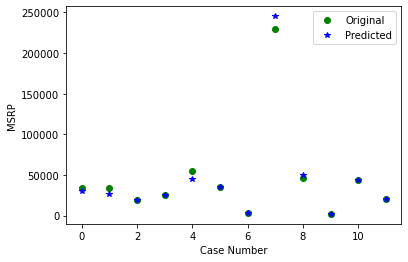

In [33]:
# Draw two sets of points
plt.plot(y_test, 'go')  # green dots for original price
plt.plot(MSRP_pred, 'b*')  # blue stars for predicted price
plt.xlabel('Case Number')
plt.ylabel('MSRP')
plt.legend(['Original','Predicted'])

# Compare two models

In [36]:
diff_compare = pd.concat([Price_diff['% Diff'],new_Price_diff['% Diff']], axis=1)
diff_compare

,% Diff,% Diff
0,-9.825196,-10.125673
1,-21.199940,-21.073668
2,-2.151345,-2.186896
3,1.036202,1.053173
4,-17.631907,-17.610197
5,-1.715657,-0.115539
6,-24.712374,-17.671146
7,12.550464,6.656446
8,4.218539,8.129868
9,20.741059,17.546795


Text(0, 0.5, '%Difference')

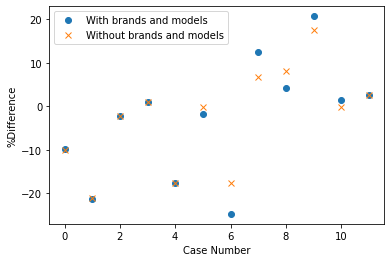

In [45]:
plt.plot(diff_compare.iloc[:,0], 'o')
plt.plot(diff_compare.iloc[:,1], 'x')
plt.legend(['With brands and models', 'Without brands and models'])
plt.xlabel('Case Number')
plt.ylabel('%Difference')

It seems like the model performs slightly better without the model and brand information, but the differences are relatively small.